In [12]:
import numpy as np
import scipy.stats as st
import matplotlib.pylab as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.diagnostic import het_breuschpagan

Построим выборку с гетероскедастичной ошибкой.

1.0


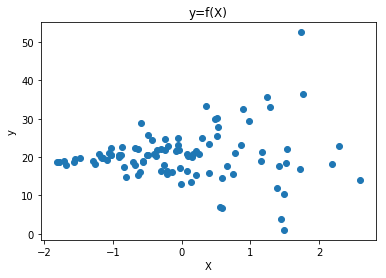

In [22]:
rs = np.random.RandomState(327)
X = rs.randn(100)
X.sort()
error = rs.randn(100)*0.1*np.arange(100)#*np.sin(np.arange(100))
y = X+error
y = y-np.min(y)+1
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('y=f(X)')
print (y.min())

Построим для нее модель линейной регрессии и посмотрим на графики предсказанной зависимости и ошибки предсказания.

In [23]:
X_c = sm.add_constant(X)
model = OLS(y, X_c).fit()
predicted = model.predict(X_c)

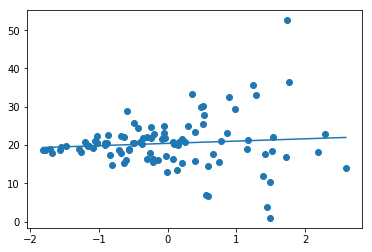

In [24]:
a, b = model.params
plt.scatter(X,y)
plt.plot(X , X*b + a)

Text(0,0.5,'y-y_predicted')

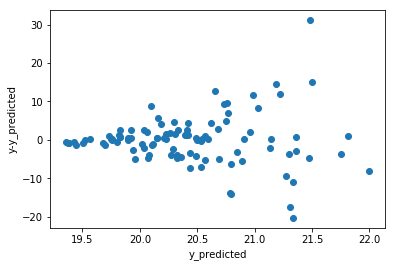

In [25]:
plt.scatter(predicted, y-predicted )
plt.xlabel('y_predicted')
plt.ylabel('y-y_predicted')

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8167
Date:                Sat, 27 Apr 2019   Prob (F-statistic):              0.368
Time:                        21:03:52   Log-Likelihood:                -329.90
No. Observations:                 100   AIC:                             663.8
Df Residuals:                      98   BIC:                             669.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.4468      0.662     30.866      0.000      19.132      21.761
x1             0.5970      0.661      0.904      0.368      -0.714       1.908
==============================================================================
Omnibus:                       28.260   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.473
Skew:                           0.757   Prob(JB):                     4.19e-27
Kurtosis:                       8.183   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Наблюдение.
Как видно из графиков и summary модели, полученная модель является вполне адекватной. Предсказанный доверительный интервал содержит $1$.

In [27]:
np.amax(y) / np.amin(y)

52.5769917956078

Т.к. $\frac{max(y)}{min(y)} > 10$, то попробуем использовать преобразование Бокса-Кокса.

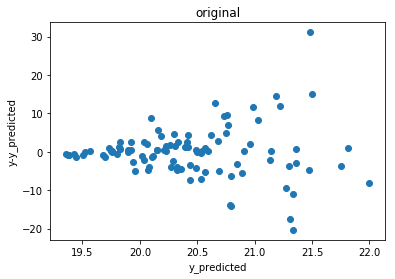

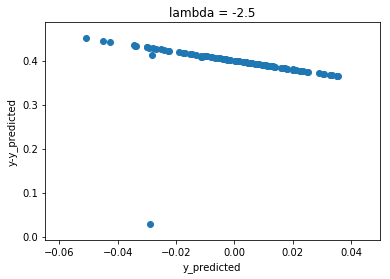

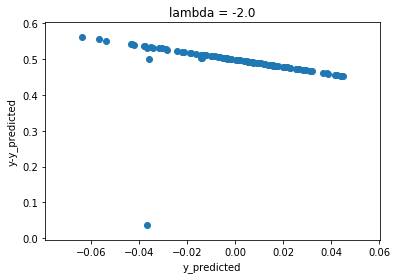

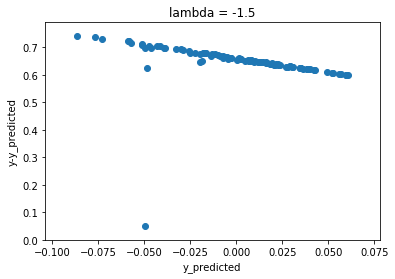

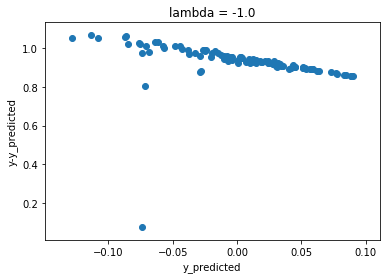

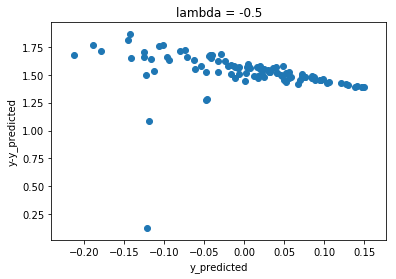

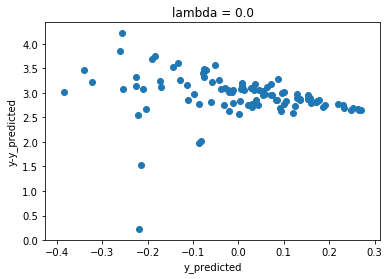

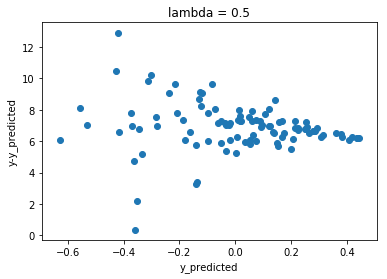

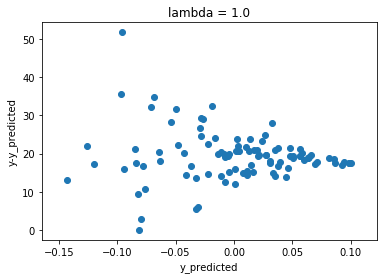

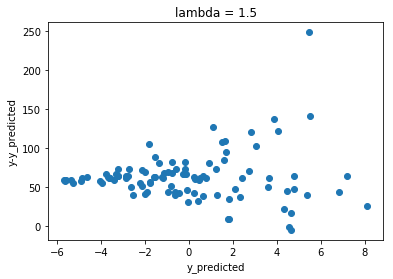

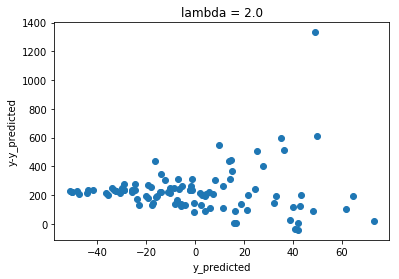

In [33]:
model = OLS(y, X_c).fit()
predicted = model.predict(X_c)
plt.scatter(predicted, y-predicted )
plt.xlabel('y_predicted')
plt.ylabel('y-y_predicted')
plt.title('original')
plt.show()
    
for l in np.arange(-2.5, 2.5, 0.5):
    model = OLS(st.boxcox(y, l), X).fit()
    predicted = model.predict(X)
    plt.scatter(predicted, st.boxcox(y, l)-predicted )
    plt.xlabel('y_predicted')
    plt.ylabel('y-y_predicted')
    plt.title('lambda = '+str(l))
    plt.show()
    

-5.0

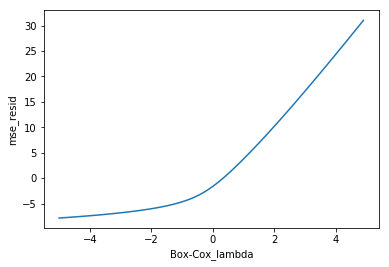

In [34]:
l = np.arange(-5, 5, 0.1)
r = []
for lam in l:   
    model = OLS(st.boxcox(y, lam), X_c).fit()
    r.append(np.log(model.mse_resid))
plt.plot(l, r)
plt.xlabel('Box-Cox_lambda')
plt.ylabel('mse_resid')
l[np.argmin(r)]

Воспользуемся значением $\lambda$, предлагаемой самой функцией $st.boxcox$ (выбрано как максимизирующее логарифм правдоподобия).

In [35]:
y_pr, l = st.boxcox(y)

l

0.7998937169960969

In [36]:
OLS(y_pr, X_c).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.2876
Date:                Sat, 27 Apr 2019   Prob (F-statistic):              0.593
Time:                        21:05:03   Log-Likelihood:                -270.10
No. Observations:                 100   AIC:                             544.2
Df Residuals:                      98   BIC:                             549.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.5973      0.364     34.582      0.000      11.874      13.320
x1             0.1948      0.363      0.536      0.593      -0.526       0.916
==============================================================================
Omnibus:                       18.236   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.001
Skew:                           0.220   Prob(JB):                     2.11e-19
Kurtosis:                       7.522   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Благодаря преобразованию Бокса-Кокса увеличился логарифм правдоподобия модели. 